In [56]:
import pandas as pd
import numpy as np
import influxdb_client
import matplotlib.pyplot as plt

from influxdb_client.client.write_api import SYNCHRONOUS

org = "FH"
url = "http://127.0.0.1:8086"
token = "Wfwp8kjSQpSaGsP2ZqXB7rEqmsjtGfaj-8nr6LQzIWmr8RbWcz4S_xBbB_484MTjmM0Y8F38WGIG4ve_1ubB1g=="
write_client = influxdb_client.InfluxDBClient(url=url, token=token, org=org)
bucket = "fh_bucket"

write_api = write_client.write_api(write_options=SYNCHRONOUS)
query_api = write_client.query_api()

In [36]:
# SIMPLE QUERY
query1 = """from(bucket: "fh_bucket")
            |> range(start: 2023-12-18T10:00:00Z, stop: now())
            |> filter(fn: (r) => r["_measurement"] == "Experiment")
            |> filter(fn: (r) => r["Device_ID"] == "0013A20041BDFD8D")
            |> filter(fn: (r) => r["Location"] == "Soest")
            |> filter(fn: (r) => r["_field"] == "Light")
            |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")
         """

query2 = """from(bucket: "fh_bucket")
            |> range(start: 2023-12-18T10:00:00Z, stop: now())
            |> filter(fn: (r) => r["_measurement"] == "Experiment")
            |> filter(fn: (r) => r["Device_ID"] == "0013A20041BDFD8D")
            |> filter(fn: (r) => r["Location"] == "Soest")
            |> filter(fn: (r) => r["_field"] == "Temperature")
            |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")
         """

query3 = """from(bucket: "fh_bucket")
            |> range(start: 2023-12-18T10:00:00Z, stop: now())
            |> filter(fn: (r) => r["_measurement"] == "Experiment")
            |> filter(fn: (r) => r["Device_ID"] == "0013A20041BDFD8D")
            |> filter(fn: (r) => r["Location"] == "Soest")
            |> filter(fn: (r) => r["_field"] == "Altitude")
            |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")
         """

query4 = """from(bucket: "fh_bucket")
            |> range(start: 2023-12-18T10:00:00Z, stop: now())
            |> filter(fn: (r) => r["_measurement"] == "Experiment")
            |> filter(fn: (r) => r["Device_ID"] == "0013A20041BDFD8D")
            |> filter(fn: (r) => r["Location"] == "Soest")
            |> filter(fn: (r) => r["_field"] == "Pressure")
            |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")
         """

query5 = """from(bucket: "fh_bucket")
            |> range(start: 2023-12-18T10:00:00Z, stop: now())
            |> filter(fn: (r) => r["_measurement"] == "Experiment")
            |> filter(fn: (r) => r["Device_ID"] == "0013A20041BDFD8D")
            |> filter(fn: (r) => r["Location"] == "Soest")
            |> filter(fn: (r) => r["_field"] == "Battery")
            |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")
         """

In [ ]:
# Query: using Table structure

tables = query_api.query(query1, org="FH")

for table in tables:
  for record in table.records:
    print(record)

In [37]:
# Query: using Pandas DataFrame
df1 = query_api.query_data_frame(query1)
df2 = query_api.query_data_frame(query2)
df3 = query_api.query_data_frame(query3)
df4 = query_api.query_data_frame(query4)
df5 = query_api.query_data_frame(query5)

In [38]:
df1 = df1[["_time", "Device_ID", "Location", "_measurement", "Light"]]
df2 = df2[["_time", "Device_ID", "Location", "_measurement", "Temperature"]]
df3 = df3[["_time", "Device_ID", "Location", "_measurement", "Altitude"]]
df4 = df4[["_time", "Device_ID", "Location", "_measurement", "Pressure"]]
df5 = df5[["_time", "Device_ID", "Location", "_measurement", "Battery"]]

In [ ]:
df5.head()

In [51]:
# Merge dataframes on common columns
dfs = [df1, df2, df3, df4, df5]

# Starting with the first dataframe
merged_df = dfs[0]

# Iterating over the rest of the dataframes and merging
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on=['_time', 'Device_ID', 'Location', '_measurement'], how='inner')

# Rename the columns
result_df = merged_df.rename(columns={'_Time': 'Time', '_measurement': 'Measurement'})

In [54]:
result_df.head()

,Time,Device_ID,Location,Measurement,Light,Temperature
0,2023-12-18 10:00:01.501166+00:00,0013A20041BDFD8D,Soest,Experiment,62.0,18.27
1,2023-12-18 10:00:16.471934+00:00,0013A20041BDFD8D,Soest,Experiment,44.0,18.30
2,2023-12-18 10:00:32.300399+00:00,0013A20041BDFD8D,Soest,Experiment,44.0,18.31
3,2023-12-18 10:00:46.831279+00:00,0013A20041BDFD8D,Soest,Experiment,44.0,18.28
4,2023-12-18 10:01:02.404398+00:00,0013A20041BDFD8D,Soest,Experiment,44.0,18.26


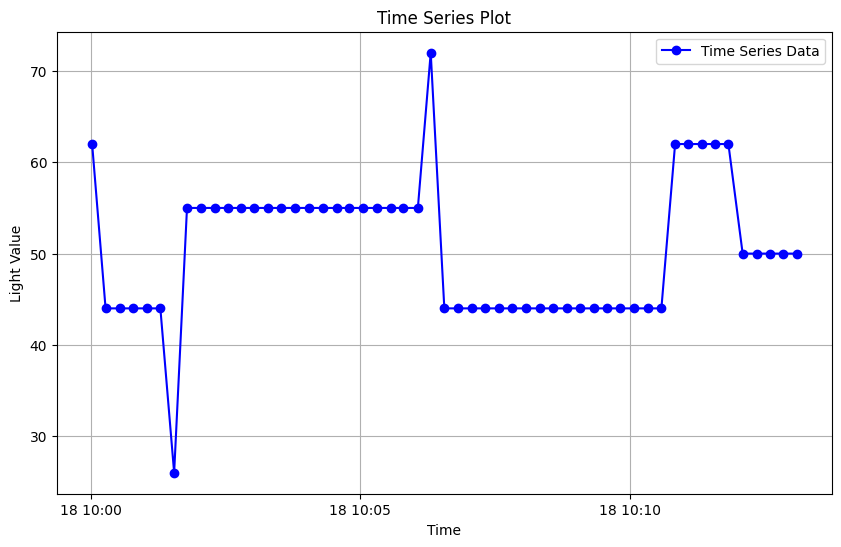

In [59]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(result_df["Time"], result_df.Light, label='Time Series Data', color='blue', marker='o')

# Activate the grid
plt.grid(True)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Light Value')
plt.title('Time Series Plot')
plt.legend()

# Show the plot
plt.show()